## Problem Statement:
Identify natural groupings of countries based on their demographic characteristics to gain insights into global population dynamics and socioeconomic patterns.

### Explaining the problem statement 
We want to group countries into different categories based on how similar they are in terms of their population and other demographic factors. This will help us understand which countries are alike and which are different when it comes to things like population size, growth rate, age of people, and whether they live in cities or rural areas.



Imagine we have a big list of countries and lots of information about each one, like how many people live there, how fast the population is growing, the average age of the people, and so on. Now, instead of looking at each country individually, we want to organize them into groups or clusters based on similarities in these factors. For example, we might find that some countries have similar population sizes, growth rates, and median ages, so we put them in one group. Other countries might have different characteristics, so they go in another group.

# Scraping the data

In [1]:
from selenium import webdriver
import pandas as pd
import time
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:

# Defining path to chromedriver
path = r"C:\path\to\your\chromedriver.exe"

# Initialize Chrome webdriver
browser = webdriver.Chrome()

# Navigate to the webpage
browser.get('https://www.worldometers.info/world-population/population-by-country/')
browser.maximize_window()

# Find the table element
table = browser.find_element(By.XPATH, '//*[@id="example2"]')

# Extract table data
table_rows = table.find_elements(By.TAG_NAME, 'tr')

data = []
headers = None
for row in table_rows:
    cols = row.find_elements(By.TAG_NAME, 'td')
    cols = [col.text for col in cols]
    data.append(cols)

# Extract headers from the webpage
header_row = table.find_elements(By.TAG_NAME, 'th')
headers = [header.text.replace('\n', '') for header in header_row]


# Close the browser
browser.quit()


print(data)

[[], ['1', 'India', '1,428,627,663', '0.81 %', '11,454,490', '481', '2,973,190', '-486,136', '2.0', '28', '36 %', '17.76 %'], ['2', 'China', '1,425,671,352', '-0.02 %', '-215,985', '152', '9,388,211', '-310,220', '1.2', '39', '65 %', '17.72 %'], ['3', 'United States', '339,996,563', '0.50 %', '1,706,706', '37', '9,147,420', '999,700', '1.7', '38', '83 %', '4.23 %'], ['4', 'Indonesia', '277,534,122', '0.74 %', '2,032,783', '153', '1,811,570', '-49,997', '2.1', '30', '59 %', '3.45 %'], ['5', 'Pakistan', '240,485,658', '1.98 %', '4,660,796', '312', '770,880', '-165,988', '3.3', '21', '35 %', '2.99 %'], ['6', 'Nigeria', '223,804,632', '2.41 %', '5,263,420', '246', '910,770', '-59,996', '5.1', '17', '54 %', '2.78 %'], ['7', 'Brazil', '216,422,446', '0.52 %', '1,108,948', '26', '8,358,140', '6,000', '1.6', '34', '88 %', '2.69 %'], ['8', 'Bangladesh', '172,954,319', '1.03 %', '1,767,947', '1,329', '130,170', '-309,977', '1.9', '27', '41 %', '2.15 %'], ['9', 'Russia', '144,444,359', '-0.19 %',

### Convert the array into a DataFrame

In [3]:
df = pd.DataFrame(data, columns=headers)
print(df)

        # Country (or dependency) Population(2023) YearlyChange   NetChange  \
0    None                    None             None         None        None   
1       1                   India    1,428,627,663       0.81 %  11,454,490   
2       2                   China    1,425,671,352      -0.02 %    -215,985   
3       3           United States      339,996,563       0.50 %   1,706,706   
4       4               Indonesia      277,534,122       0.74 %   2,032,783   
..    ...                     ...              ...          ...         ...   
230   230              Montserrat            4,386      -0.09 %          -4   
231   231        Falkland Islands            3,791       0.29 %          11   
232   232                    Niue            1,935       0.05 %           1   
233   233                 Tokelau            1,893       1.18 %          22   
234   234                Holy See              518       1.57 %           8   

    Density(P/Km²) Land Area(Km²) Migrants(net) Fer

### Dropping  unnecessary '#', and 'WorldShare' columns

In [4]:

df.drop(columns=['#', 'WorldShare'], inplace=True)

# Print the updated DataFrame
print(df)


    Country (or dependency) Population(2023) YearlyChange   NetChange  \
0                      None             None         None        None   
1                     India    1,428,627,663       0.81 %  11,454,490   
2                     China    1,425,671,352      -0.02 %    -215,985   
3             United States      339,996,563       0.50 %   1,706,706   
4                 Indonesia      277,534,122       0.74 %   2,032,783   
..                      ...              ...          ...         ...   
230              Montserrat            4,386      -0.09 %          -4   
231        Falkland Islands            3,791       0.29 %          11   
232                    Niue            1,935       0.05 %           1   
233                 Tokelau            1,893       1.18 %          22   
234                Holy See              518       1.57 %           8   

    Density(P/Km²) Land Area(Km²) Migrants(net) Fert.Rate Med.Age UrbanPop %  
0             None           None          N

### Converting data to csv

In [5]:
#df.to_csv("C:\\Users\\shrut\\OneDrive\\Desktop\\worldometer.csv")

In [6]:
data = pd.read_csv("C:\\Users\\shrut\\OneDrive\\Desktop\\worldometer.csv")

In [7]:
data

,Unnamed: 0,Country (or dependency),Population(2023),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,Med.Age,UrbanPop %
0,1,India,"1,42,86,27,663",0.81%,"1,14,54,490",481,"29,73,190","-4,86,136",2.0,28,36%
1,2,China,"1,42,56,71,352",-0.02%,"-2,15,985",152,"93,88,211","-3,10,220",1.2,39,65%
2,3,United States,"33,99,96,563",0.50%,"17,06,706",37,"91,47,420","9,99,700",1.7,38,83%
3,4,Indonesia,"27,75,34,122",0.74%,"20,32,783",153,"18,11,570","-49,997",2.1,30,59%
4,5,Pakistan,"24,04,85,658",1.98%,"46,60,796",312,"7,70,880","-1,65,988",3.3,21,35%
...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,"4,386",-0.09%,-4,44,100,78,1.6,44,11%
230,231,Falkland Islands,"3,791",0.29%,11,3,"12,170",-98,1.6,40,62%
231,232,Niue,"1,935",0.05%,1,7,260,56,2.4,36,41%
232,233,Tokelau,"1,893",1.18%,22,189,10,-987,2.6,27,141%


In [8]:
print(headers)

['#', 'Country (or dependency)', 'Population(2023)', 'YearlyChange', 'NetChange', 'Density(P/Km²)', 'Land Area(Km²)', 'Migrants(net)', 'Fert.Rate', 'Med.Age', 'UrbanPop %', 'WorldShare']


### Removing percentage symbol from 'UrbanPop %' and 'YearlyChange' columns 

In [9]:
data['UrbanPop %'] = data['UrbanPop %'].str.replace('%', '')
data['YearlyChange'] = data['YearlyChange'].str.replace('%', '')
print(data)

    Unnamed: 0 Country (or dependency) Population(2023) YearlyChange  \
0            1                   India   1,42,86,27,663         0.81   
1            2                   China   1,42,56,71,352        -0.02   
2            3           United States     33,99,96,563         0.50   
3            4               Indonesia     27,75,34,122         0.74   
4            5                Pakistan     24,04,85,658         1.98   
..         ...                     ...              ...          ...   
229        230              Montserrat            4,386        -0.09   
230        231        Falkland Islands            3,791         0.29   
231        232                    Niue            1,935         0.05   
232        233                 Tokelau            1,893         1.18   
233        234                Holy See              518         1.57   

       NetChange Density(P/Km²) Land Area(Km²) Migrants(net)  Fert.Rate  \
0    1,14,54,490            481      29,73,190     -4,86,136

### Handling Missing value

In [10]:
data.isna().sum()

Unnamed: 0                 0
Country (or dependency)    0
Population(2023)           0
YearlyChange               0
NetChange                  0
Density(P/Km²)             0
Land Area(Km²)             0
Migrants(net)              0
Fert.Rate                  0
Med.Age                    0
UrbanPop %                 0
dtype: int64

In [11]:
data

,Unnamed: 0,Country (or dependency),Population(2023),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,Med.Age,UrbanPop %
0,1,India,"1,42,86,27,663",0.81,"1,14,54,490",481,"29,73,190","-4,86,136",2.0,28,36
1,2,China,"1,42,56,71,352",-0.02,"-2,15,985",152,"93,88,211","-3,10,220",1.2,39,65
2,3,United States,"33,99,96,563",0.50,"17,06,706",37,"91,47,420","9,99,700",1.7,38,83
3,4,Indonesia,"27,75,34,122",0.74,"20,32,783",153,"18,11,570","-49,997",2.1,30,59
4,5,Pakistan,"24,04,85,658",1.98,"46,60,796",312,"7,70,880","-1,65,988",3.3,21,35
...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,"4,386",-0.09,-4,44,100,78,1.6,44,11
230,231,Falkland Islands,"3,791",0.29,11,3,"12,170",-98,1.6,40,62
231,232,Niue,"1,935",0.05,1,7,260,56,2.4,36,41
232,233,Tokelau,"1,893",1.18,22,189,10,-987,2.6,27,141


In [12]:
data.drop(["Unnamed: 0", "Country (or dependency)"], axis = 1, inplace = True)

In [13]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].replace({',': ''}, regex=True)

In [14]:
data = data.replace(',', '', regex=True)

In [15]:
data

,Population(2023),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,Med.Age,UrbanPop %
0,1428627663,0.81,11454490,481,2973190,-486136,2.0,28,36
1,1425671352,-0.02,-215985,152,9388211,-310220,1.2,39,65
2,339996563,0.50,1706706,37,9147420,999700,1.7,38,83
3,277534122,0.74,2032783,153,1811570,-49997,2.1,30,59
4,240485658,1.98,4660796,312,770880,-165988,3.3,21,35
...,...,...,...,...,...,...,...,...,...
229,4386,-0.09,-4,44,100,78,1.6,44,11
230,3791,0.29,11,3,12170,-98,1.6,40,62
231,1935,0.05,1,7,260,56,2.4,36,41
232,1893,1.18,22,189,10,-987,2.6,27,141


## Scaling the data

In [16]:
# Define the StandardScaler
ss = StandardScaler()

tr3 = ColumnTransformer([
    ("SS1", ss, [0]),
    ("SS2", ss, [1]),
    ("SS3", ss, [2]),
    ("SS4", ss, [3]),
    ("SS5", ss, [4]),
    ("SS6", ss, [5]),
    ("SS7", ss, [6]),
    ("SS8", ss, [7]),
    ("SS9", ss, [8])
], remainder='passthrough')


In [17]:
tr3

ColumnTransformer(remainder='passthrough',
                  transformers=[('SS1', StandardScaler(), [0]),
                                ('SS2', StandardScaler(), [1]),
                                ('SS3', StandardScaler(), [2]),
                                ('SS4', StandardScaler(), [3]),
                                ('SS5', StandardScaler(), [4]),
                                ('SS6', StandardScaler(), [5]),
                                ('SS7', StandardScaler(), [6]),
                                ('SS8', StandardScaler(), [7]),
                                ('SS9', StandardScaler(), [8])])

In [18]:
data = tr3.fit_transform(data)


In [19]:
data

array([[10.17017547, -0.12540382, 11.1581267 , ..., -0.36342375,
        -0.34358872, -0.84040876],
       [10.14861108, -0.79489059, -0.51617733, ..., -1.05692963,
         0.80348958, -0.13301434],
       [ 2.22930883, -0.37545309,  1.40714449, ..., -0.62348846,
         0.69920973,  0.30605806],
       ...,
       [-0.25073422, -0.73842785, -0.30012047, ..., -0.01667081,
         0.49065004, -0.7184442 ],
       [-0.25073453,  0.1730421 , -0.30009946, ...,  0.15670565,
        -0.44786857,  1.72084691],
       [-0.25074456,  0.48762022, -0.30011347, ...,  1.023588  ,
        -0.34358872,  4.16013802]])

In [20]:
data = pd.DataFrame(data)

In [21]:
data

,0,1,2,3,4,5,6,7,8
0,10.170175,-0.125404,11.158127,0.001543,1.432513,-2.869900,-0.363424,-0.343589,-0.840409
1,10.148611,-0.794891,-0.516177,-0.140529,5.234219,-1.833386,-1.056930,0.803490,-0.133014
2,2.229309,-0.375453,1.407144,-0.190190,5.091520,5.884788,-0.623488,0.699210,0.306058
3,1.773685,-0.181867,1.733328,-0.140097,0.744107,-0.300127,-0.276736,-0.135029,-0.279372
4,1.503441,0.818331,4.362204,-0.071436,0.127368,-0.983557,0.763523,-1.073548,-0.864802
...,...,...,...,...,...,...,...,...,...
229,-0.250716,-0.851353,-0.300125,-0.187167,-0.329416,-0.005080,-0.710177,1.324889,-1.450232
230,-0.250721,-0.544841,-0.300110,-0.204872,-0.322263,-0.006117,-0.710177,0.907769,-0.206193
231,-0.250734,-0.738428,-0.300120,-0.203145,-0.329321,-0.005210,-0.016671,0.490650,-0.718444
232,-0.250735,0.173042,-0.300099,-0.124552,-0.329469,-0.011355,0.156706,-0.447869,1.720847


## Feature scaling

In [22]:
# Assuming 'X' is your preprocessed data (without the country names)
X = data.iloc[:, 0:-1].values  # Exclude the first column (country names)

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [23]:
X_pca

array([[-5.77206594e+00,  1.30009433e+01],
       [-4.75408621e-01,  9.67890533e+00],
       [ 1.01651047e+00,  3.83830605e+00],
       [-7.81972712e-01,  2.41789414e+00],
       [-3.28491062e+00,  2.70614800e+00],
       [-4.55483085e+00,  2.34948525e+00],
       [ 4.63182661e-03,  3.63988089e+00],
       [-9.83089060e-01,  1.53780703e+00],
       [ 7.67434708e-01,  5.19432866e+00],
       [-1.43452642e-01,  1.29636830e+00],
       [-3.14728219e+00,  1.12635998e+00],
       [ 2.44676770e+00,  6.08406941e-01],
       [-1.37831671e+00,  8.20668645e-01],
       [-1.45068987e+00,  8.80449003e-01],
       [-4.60902342e+00,  8.41771430e-01],
       [ 1.51662326e-01,  6.64877489e-01],
       [ 2.58870487e-01,  9.48584762e-01],
       [-7.56654045e-02,  8.53674039e-01],
       [ 1.85775033e+00,  4.49405010e-01],
       [ 1.35037411e+00,  5.56972594e-01],
       [ 1.28852866e+00,  2.99932455e-01],
       [-3.25708295e+00,  7.27340067e-02],
       [ 1.27114504e+00,  4.35624757e-01],
       [-1.

In [24]:
data = pd.DataFrame(X_pca)
data

,0,1
0,-5.772066,13.000943
1,-0.475409,9.678905
2,1.016510,3.838306
3,-0.781973,2.417894
4,-3.284911,2.706148
...,...,...
229,1.631299,0.094922
230,1.250323,-0.031283
231,0.774963,-0.248128
232,-0.271229,-0.607972


## scatter plot

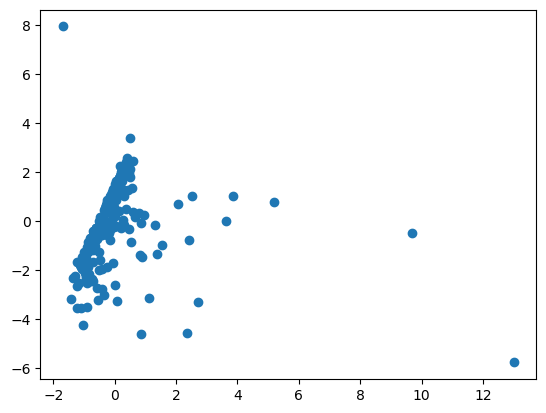

In [25]:
plt.scatter(data[1],data[0])

In [26]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Applying elbow method

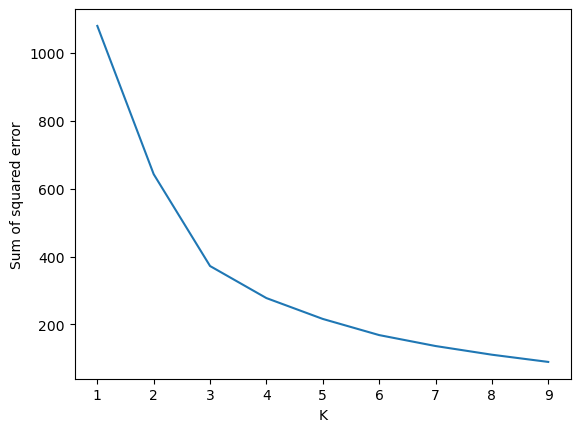

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[[0,1]])
y_predicted

array([2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [29]:
data['cluster']=y_predicted
data

,0,1,cluster
0,-5.772066,13.000943,2
1,-0.475409,9.678905,2
2,1.016510,3.838306,1
3,-0.781973,2.417894,1
4,-3.284911,2.706148,0
...,...,...,...
229,1.631299,0.094922,1
230,1.250323,-0.031283,1
231,0.774963,-0.248128,1
232,-0.271229,-0.607972,0


In [30]:
km.cluster_centers_

array([[-1.65842154, -0.52345756],
       [ 1.05686507,  0.16239178],
       [-3.12373728, 11.33992433]])

C:\Users\shrut\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


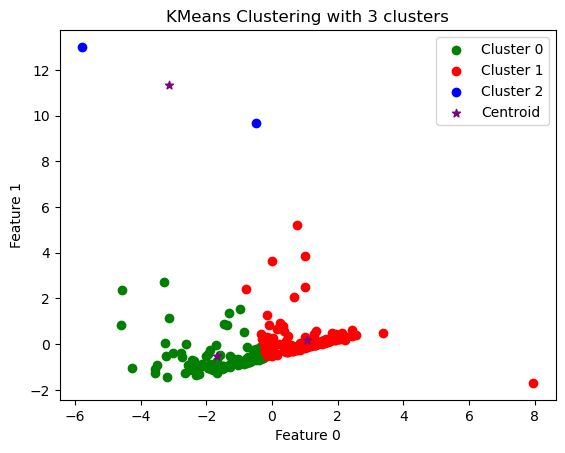

In [31]:
km = KMeans(n_clusters=3)

# Fit KMeans to your data
km.fit(data)

# Create separate dataframes for each cluster
df1 = data[km.labels_ == 0]
df2 = data[km.labels_ == 1]
df3 = data[km.labels_ == 2]

# Plot the clusters
plt.scatter(df1[0], df1[1], color='green', label='Cluster 0')
plt.scatter(df2[0], df2[1], color='red', label='Cluster 1')
plt.scatter(df3[0], df3[1], color='blue', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='Centroid')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()
plt.title('KMeans Clustering with 3 clusters')
plt.show()

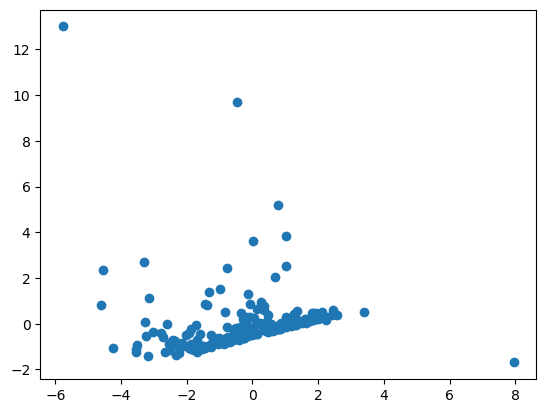

In [32]:
plt.scatter(data[0],data[1])

In [33]:
# Split the data into features (X) and target variable (y)
X = data.drop('cluster', axis=1)
y = data['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}

# Define hyperparameters for tuning
params = {
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Logistic Regression': {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Naive Bayes': {}
}

# Initialize evaluation metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    
}

# Average settings for precision, recall, and F1 score
average_settings = ['micro', 'macro', 'weighted', None]

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    results[name] = {}
    for metric_name, metric_func in metrics.items():
        if metric_name in ['Precision', 'Recall', 'F1 Score']:
            for average_setting in average_settings:
                if average_setting is None:
                    metric_value = metric_func(y_test, y_pred, average=average_setting, zero_division=0)
                else:
                    metric_value = metric_func(y_test, y_pred, average=average_setting)
                results[name][f'{metric_name} ({average_setting})'] = metric_value
       
        else:
            results[name][metric_name] = metric_func(y_test, y_pred)

# Print results
print("\nResults:")
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print()

Training KNN...
Training Logistic Regression...


C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\shrut\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shrut\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this beh

Training Decision Tree...
Training Random Forest...


C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Training SVM...
Training Naive Bayes...


C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\shrut\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



Results:
KNN:
Accuracy: 0.9787234042553191
Precision (micro): 0.9787234042553191
Precision (macro): 0.9642857142857143
Precision (weighted): 0.9802431610942249
Precision (None): [0.92857143 1.        ]
Recall (micro): 0.9787234042553191
Recall (macro): 0.9852941176470589
Recall (weighted): 0.9787234042553191
Recall (None): [1.         0.97058824]
F1 Score (micro): 0.9787234042553191
F1 Score (macro): 0.9740187949143173
F1 Score (weighted): 0.9789586347223692
F1 Score (None): [0.96296296 0.98507463]

Logistic Regression:
Accuracy: 1.0
Precision (micro): 1.0
Precision (macro): 1.0
Precision (weighted): 1.0
Precision (None): [1. 1.]
Recall (micro): 1.0
Recall (macro): 1.0
Recall (weighted): 1.0
Recall (None): [1. 1.]
F1 Score (micro): 1.0
F1 Score (macro): 1.0
F1 Score (weighted): 1.0
F1 Score (None): [1. 1.]

Decision Tree:
Accuracy: 1.0
Precision (micro): 1.0
Precision (macro): 1.0
Precision (weighted): 1.0
Precision (None): [1. 1.]
Recall (micro): 1.0
Recall (macro): 1.0
Recall (weigh